In [7]:


import pandas as pd#pd.read_csv 
import numpy as np
#STEP 1: Acquiring the data-- CSV to dataframe-- data manipulation is done using the pandas library

train = pd.read_csv('/Users/i856168/Desktop/Kaggle/Titanic Challenge/train.csv')
test = pd.read_csv('/Users/i856168/Desktop/Kaggle/Titanic Challenge/test.csv')






array(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'], dtype=object)

In [13]:
#STEP 2: Analyzing the features:
print(train.columns.values)#Gives you the names of the features

#Categorical features:
print('Survived, Pclass-- Ordinal, Sex, Embarked')
#Numerical features:
print('Age, Fare-Continuous, SibSp and Parch- Discrete')
#Mixed feature:
print('Ticket and Cabin are alphanumeric')


#incomplete
print('age and cabin')

#Type of each feature
train.info()

#Describe the dataset
train.describe()
train.describe(include=['O'])
#Mean of survived - 38% --> survival rat
print('People shared cabins, tickets are 20% duplicates, 67% male and most of the passengers embarked the s port')




['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']
Survived, Pclass-- Ordinal, Sex, Embarked
Age, Fare-Continuous, SibSp and Parch- Discrete
Ticket and Cabin are alphanumeric
age and cabin
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Graham, Mr. George Edward",male,CA. 2343,C23 C25 C27,S
freq,1,577,7,4,644


In [14]:
print('Basis: Find how well all these features correlate with the Survived fetaure\n')
print('Dropped: PassengerId --al unique values, Cabin and tickets are dropped cos of duplicates, name--also dropped')
print('Create: Extract titles from name, create age bands, total count of family on board, band for fare, ')


Basis: Find how well all these features correlate with the Survived fetaure

Dropped: PassengerId --al unique values, Cabin and tickets are dropped cos of duplicates, name--also dropped
Create: Extract titles from name, create age bands, total count of family on board, band for fare, 


In [16]:
#Taking mean value to describe the correlation  withe the feature
train[['Survived','Pclass']].groupby(['Pclass'], as_index = False).mean().sort_values(by = 'Survived', ascending=False)
#Pclass 1 had high survival rate

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [19]:
train[['Survived','Sex']].groupby(['Sex'], as_index =False).mean().sort_values(by= 'Survived',ascending=False)
#Females had high survival rate

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [21]:
train[['Survived','SibSp']].groupby(['SibSp'], as_index = False).mean().sort_values(by = 'Survived',ascending = False)
train[['Survived','Parch']].groupby(['Parch'], as_index = False).mean().sort_values(by = 'Survived',ascending = False)
#0 correlation indicates no point in having this induvidual feature

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


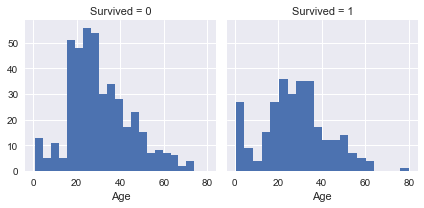

In [23]:
#Correlating numerical features-- using plots
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
#Step 2: Visualizing the data-- using the seaborn and the matplotlib library
g=sns.FacetGrid(train,col='Survived')
g.map(plt.hist,'Age',bins=20)




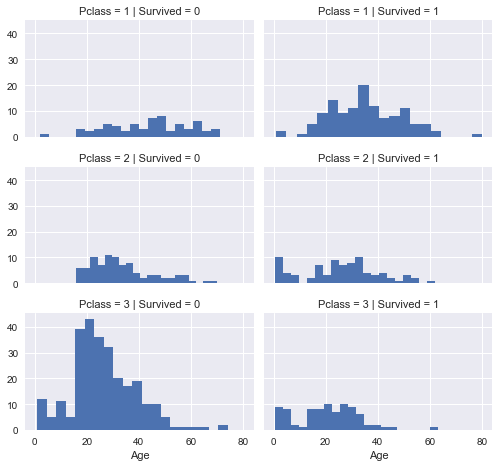

In [24]:
#Plotting age band in Pclass
g= sns.FacetGrid(train,col='Survived',row='Pclass',size=2.2,aspect =1.6)
g.map(plt.hist,'Age',bins=20)


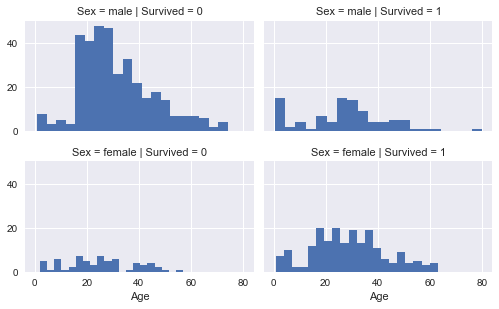

In [25]:
g = sns.FacetGrid(train,col='Survived',row='Sex',size=2.2,aspect =1.6)
g.map(plt.hist,'Age',bins=20)

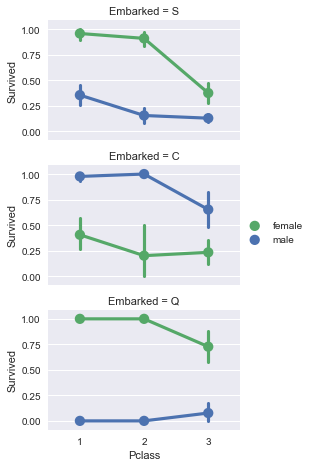

In [29]:
grid = sns.FacetGrid(train, row='Embarked', size=2.2, aspect=1.6)
grid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette='deep')
grid.add_legend()

In [ ]:
#banding fare
grid = sns.FacetGrid(train, row='Embarked', col='Survived', size=2.2, aspect=1.6)
grid.map(sns.barplot, 'Sex', 'Fare', alpha=.5, ci=None)
grid.add_legend()